# Get deps and event

## Dependencies


In [2]:
from datetime import timedelta
import math
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=False)
ff1.Cache.enable_cache('./cache')

plotting.setup_mpl()

# Magyar, %-ban mennyi a pit-ben %-ban
# Hány km-t ment

session = ff1.get_session(2022, 'Dutch', 'R')
session.load()

<IPython.core.display.Javascript object>

## Config


In [3]:
tyreTypes = ["SOFT", "MEDIUM", "HARD"]

session = ff1.get_session(2022, 'Dutch', 'R')
session.load()

single_driver_name = 'LEC'
dual_driver_names = []
multiple_drivers = []

# Single driver stats for tyre types

SOFT LapTime: 0 days 00:01:14.413000 34.0(C)
MED LapTime: 0 days 00:01:16.077000 32.8(C)
HARD LapTime: 0 days 00:01:14.824000 32.6(C)


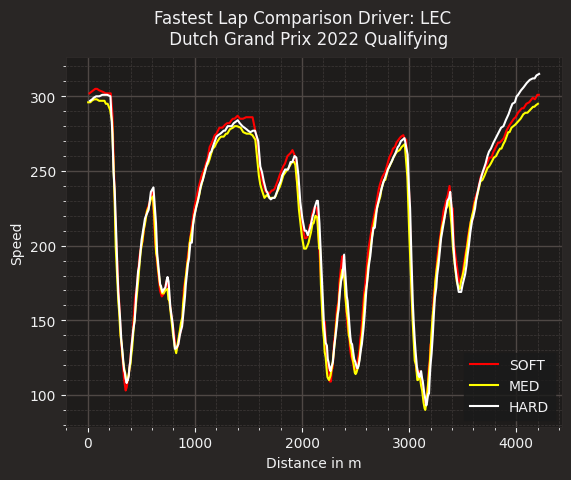

In [4]:
driver_laps = session.laps.pick_driver(single_driver_name)

track_temperatures = session.weather_data.TrackTemp
#print(track)
driver_best_soft_lap = driver_laps.pick_tyre("SOFT").pick_fastest(only_by_time=True)
driver_best_medium_lap = driver_laps.pick_tyre("MEDIUM").pick_fastest(only_by_time=True)
driver_best_hard_lap = driver_laps.pick_tyre("HARD").pick_fastest(only_by_time=True)

fig, ax = plt.subplots()

if str(driver_best_soft_lap.LapTime) != "nan":
    driver_best_soft_telemetry = driver_best_soft_lap.get_car_data().add_distance()
    print(f"SOFT LapTime: { driver_best_soft_lap.LapTime } { track_temperatures[math.ceil(driver_best_soft_lap.LapStartTime.seconds/60)] }(C)")
    ax.plot(driver_best_soft_telemetry['Distance'], driver_best_soft_telemetry['Speed'], color='red', label='SOFT')

if str(driver_best_medium_lap.LapTime) != "nan":
    driver_best_medium_telemetry = driver_best_medium_lap.get_car_data().add_distance()
    print(f"MED LapTime: { driver_best_medium_lap.LapTime } { track_temperatures[math.ceil(driver_best_medium_lap.LapStartTime.seconds/60)] }(C)")
    ax.plot(driver_best_medium_telemetry['Distance'], driver_best_medium_telemetry['Speed'], color='yellow', label='MED')

if str(driver_best_hard_lap.LapTime) != "nan":
    driver_best_hard_telemetry = driver_best_hard_lap.get_car_data().add_distance()
    print(f"HARD LapTime: { driver_best_hard_lap.LapTime } { track_temperatures[math.ceil(driver_best_hard_lap.LapStartTime.seconds/60)] }(C)")
    ax.plot(driver_best_hard_telemetry['Distance'], driver_best_hard_telemetry['Speed'], color='white', label='HARD')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed')

ax.legend()
plt.Figure(dpi=1200)
plt.suptitle(f"Fastest Lap Comparison Driver: {driver_best_soft_lap.Driver} \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")
plt.show()
fig.set_dpi(1200)
fig.savefig(f"output/Tyres_{single_driver_name}.png", dpi=1200)

# Multiple driver stats for tyres

/var/folders/jl/vz624bx91n5gr7lzcql94x980000gn/T/ipykernel_29112/3038146639.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  soft_telemetry = soft_telemetry.append(driver_telemetry)
/var/folders/jl/vz624bx91n5gr7lzcql94x980000gn/T/ipykernel_29112/3038146639.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mixed_telemetry = mixed_telemetry.append(driver_telemetry)
/var/folders/jl/vz624bx91n5gr7lzcql94x980000gn/T/ipykernel_29112/3038146639.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  soft_group = soft_group.append(bestLap)
/var/folders/jl/vz624bx91n5gr7lzcql94x980000gn/T/ipykernel_29112/3038146639.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

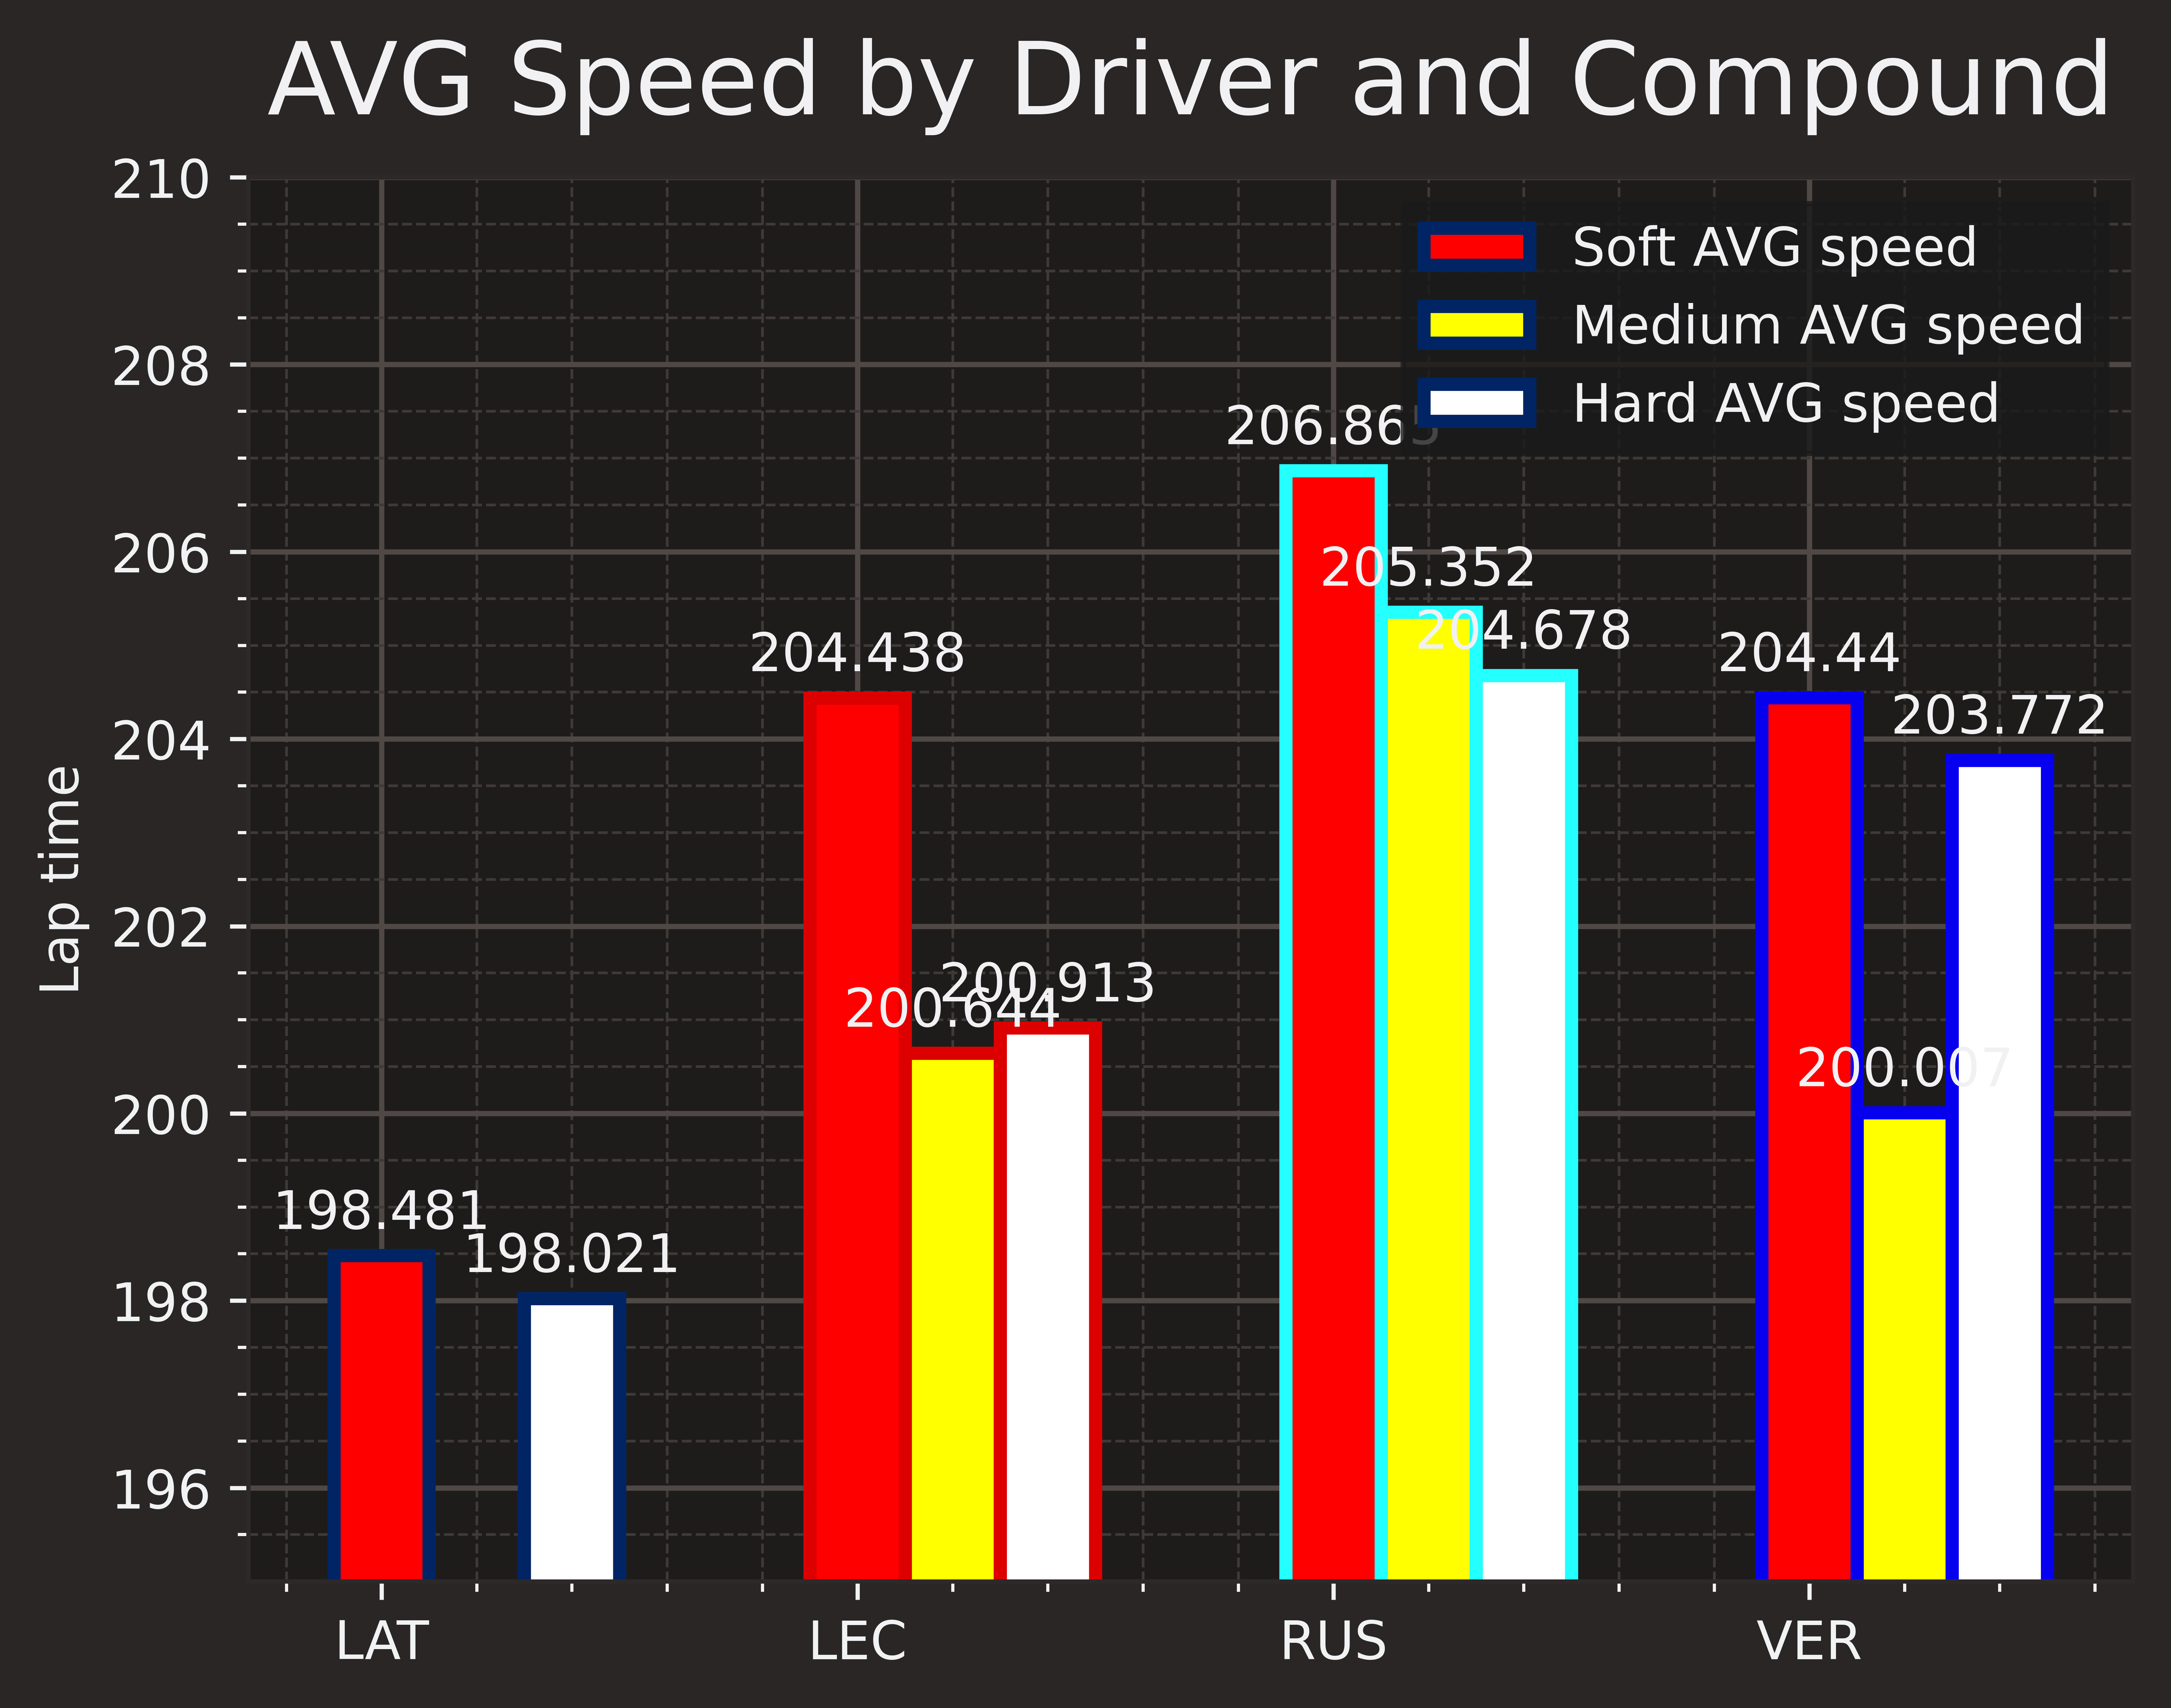

In [5]:


ff1.Cache.enable_cache('./cache')

plotting.setup_mpl()

session = ff1.get_session(2022, 'Dutch', 'R')
session.load()

track = session.weather_data.TrackTemp

tyreTypes = ["SOFT", "MEDIUM", "HARD"]

drivers = ["LAT", "LEC", "RUS", "VER"]

drivers.sort()
concated_names = ""
driverColors = []

for x in drivers:
    concated_names += x+"_"
    driverColors.append(ff1.plotting.driver_color(x))

fig, ax = plt.subplots()

soft_group = pd.DataFrame()
med_group = pd.DataFrame()
hard_group = pd.DataFrame()

soft_telemetry = pd.DataFrame()
med_telemetry = pd.DataFrame()
hard_telemetry = pd.DataFrame()

mixed_telemetry = pd.DataFrame()

for driver_item in drivers:
    driver = session.laps.pick_driver(driver_item)
    
    bestLap = driver.pick_tyre("SOFT")
    bestLap = bestLap.sort_values(by=["LapTime"])
    bestLap = bestLap[0:1]
    
    for cLap in bestLap.iterlaps():
        driver_telemetry = cLap[1].get_car_data()
        driver_telemetry["Driver"] = driver_item
        driver_telemetry["LapNumber"] = cLap[1]["LapNumber"]

        driver_telemetry["LapTime"] = cLap[1]["LapTime"]
        driver_telemetry["TyreLife"] = cLap[1]["TyreLife"]
        driver_telemetry["FreshTyre"] = cLap[1]["FreshTyre"]

        driver_telemetry['Compound'] = cLap[1]['Compound']
    
        soft_telemetry = soft_telemetry.append(driver_telemetry)
        mixed_telemetry = mixed_telemetry.append(driver_telemetry)

    soft_group = soft_group.append(bestLap)

    bestLap = driver.pick_tyre("MEDIUM")
    bestLap = bestLap.sort_values(by=["LapTime"])
    bestLap = bestLap[0:1]
    for cLap in bestLap.iterlaps():
        driver_telemetry = cLap[1].get_car_data()
        driver_telemetry["Driver"] = driver_item
        driver_telemetry["LapNumber"] = cLap[1]["LapNumber"]

        driver_telemetry["LapTime"] = cLap[1]["LapTime"]
        driver_telemetry["TyreLife"] = cLap[1]["TyreLife"]
        driver_telemetry["FreshTyre"] = cLap[1]["FreshTyre"]

        driver_telemetry['Compound'] = cLap[1]['Compound']
    
        med_telemetry = med_telemetry.append(driver_telemetry)
        mixed_telemetry = mixed_telemetry.append(driver_telemetry)
    med_group = med_group.append(bestLap)

    bestLap = driver.pick_tyre("HARD")
    bestLap = bestLap.sort_values(by=["LapTime"])
    bestLap = bestLap[0:1]
    for cLap in bestLap.iterlaps():
        driver_telemetry = cLap[1].get_car_data()
        driver_telemetry["Driver"] = driver_item
        driver_telemetry["LapNumber"] = cLap[1]["LapNumber"]

        driver_telemetry["LapTime"] = cLap[1]["LapTime"]
        driver_telemetry["TyreLife"] = cLap[1]["TyreLife"]
        driver_telemetry["FreshTyre"] = cLap[1]["FreshTyre"]

        driver_telemetry['Compound'] = cLap[1]['Compound']
    
        hard_telemetry = hard_telemetry.append(driver_telemetry)
        mixed_telemetry = mixed_telemetry.append(driver_telemetry)
    hard_group = hard_group.append(bestLap)

    #driver_item.driverColor = ff1.plotting.driver_color(driver_item.driverName)

soft_group = soft_group[["Driver", "LapTime", "LapNumber", "Compound", "TyreLife", "FreshTyre"]]
med_group = med_group[["Driver", "LapTime", "LapNumber", "Compound", "TyreLife", "FreshTyre"]]
hard_group = hard_group[["Driver", "LapTime", "LapNumber", "Compound", "TyreLife", "FreshTyre"]]

""" show(soft_telemetry)

show(soft_group)
show(med_group)
show(hard_group) """

avg_soft_speed = soft_telemetry.groupby(["Driver", "LapNumber", "LapTime", "Compound"])["Speed"].mean().reset_index().sort_values("Driver")
avg_med_speed = med_telemetry.groupby(["Driver", "LapNumber", "LapTime", "Compound"])["Speed"].mean().reset_index().sort_values("Driver")
avg_hard_speed = hard_telemetry.groupby(["Driver", "LapNumber", "LapTime", "Compound"])["Speed"].mean().reset_index().sort_values("Driver")

avg_speed = mixed_telemetry.groupby(["Driver", "LapNumber", "LapTime", "Compound"])["Speed"].mean().reset_index().sort_values("Driver")
#show(avg_speed)

max_speed = mixed_telemetry.groupby(["Driver", "LapNumber", "LapTime", "Compound"])["Speed"].max().reset_index()
#show(max_speed)

# Select the compound with the highest average speed
fastest_compounds = avg_speed.loc[avg_speed.groupby(['Driver'])['Speed'].idxmax()]

# Get rid of the speed column and rename the Compound column
fastest_compounds = fastest_compounds[['Driver', 'Compound']].rename(columns={'Compound': 'Fastest_compound'})

width = 0.20
soft_x_ticks = np.arange(len(avg_soft_speed))
med_x_ticks = [i+width for i in soft_x_ticks]
hard_x_ticks = [i+width for i in med_x_ticks]
#x = np.array(avg_soft_speed["Driver"].values)

avg_soft = np.array(avg_soft_speed["Speed"].values)
avg_med = np.array(avg_med_speed["Speed"].values)
avg_hard = np.array(avg_hard_speed["Speed"].values)

labels = np.array(avg_soft_speed["Driver"].values)
rects1 = ax.bar(soft_x_ticks, avg_soft, width, color="red", edgecolor=driverColors, linewidth=2.5, label='Soft AVG speed')
rects2 = ax.bar(med_x_ticks, avg_med, width, color="yellow", edgecolor=driverColors, linewidth=2.5, label='Medium AVG speed')
rects3 = ax.bar(hard_x_ticks, avg_hard, width, color="white", edgecolor=driverColors, linewidth=2.5, label='Hard AVG speed')
#rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Lap time')
ax.set_title('AVG Speed by Driver and Compound')
ax.set_xticks(soft_x_ticks, labels)
ax.set_ylim([195, 210])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

#fig.tight_layout()
plt.Figure(dpi=1200)
fig.set_dpi(1200)
fig.savefig(f"output/AVG_Speed_by_Tyres_{concated_names}.png", dpi=1200)
plt.show()


# Get lap times by tyre compound


## AVG Speed

0
1
2


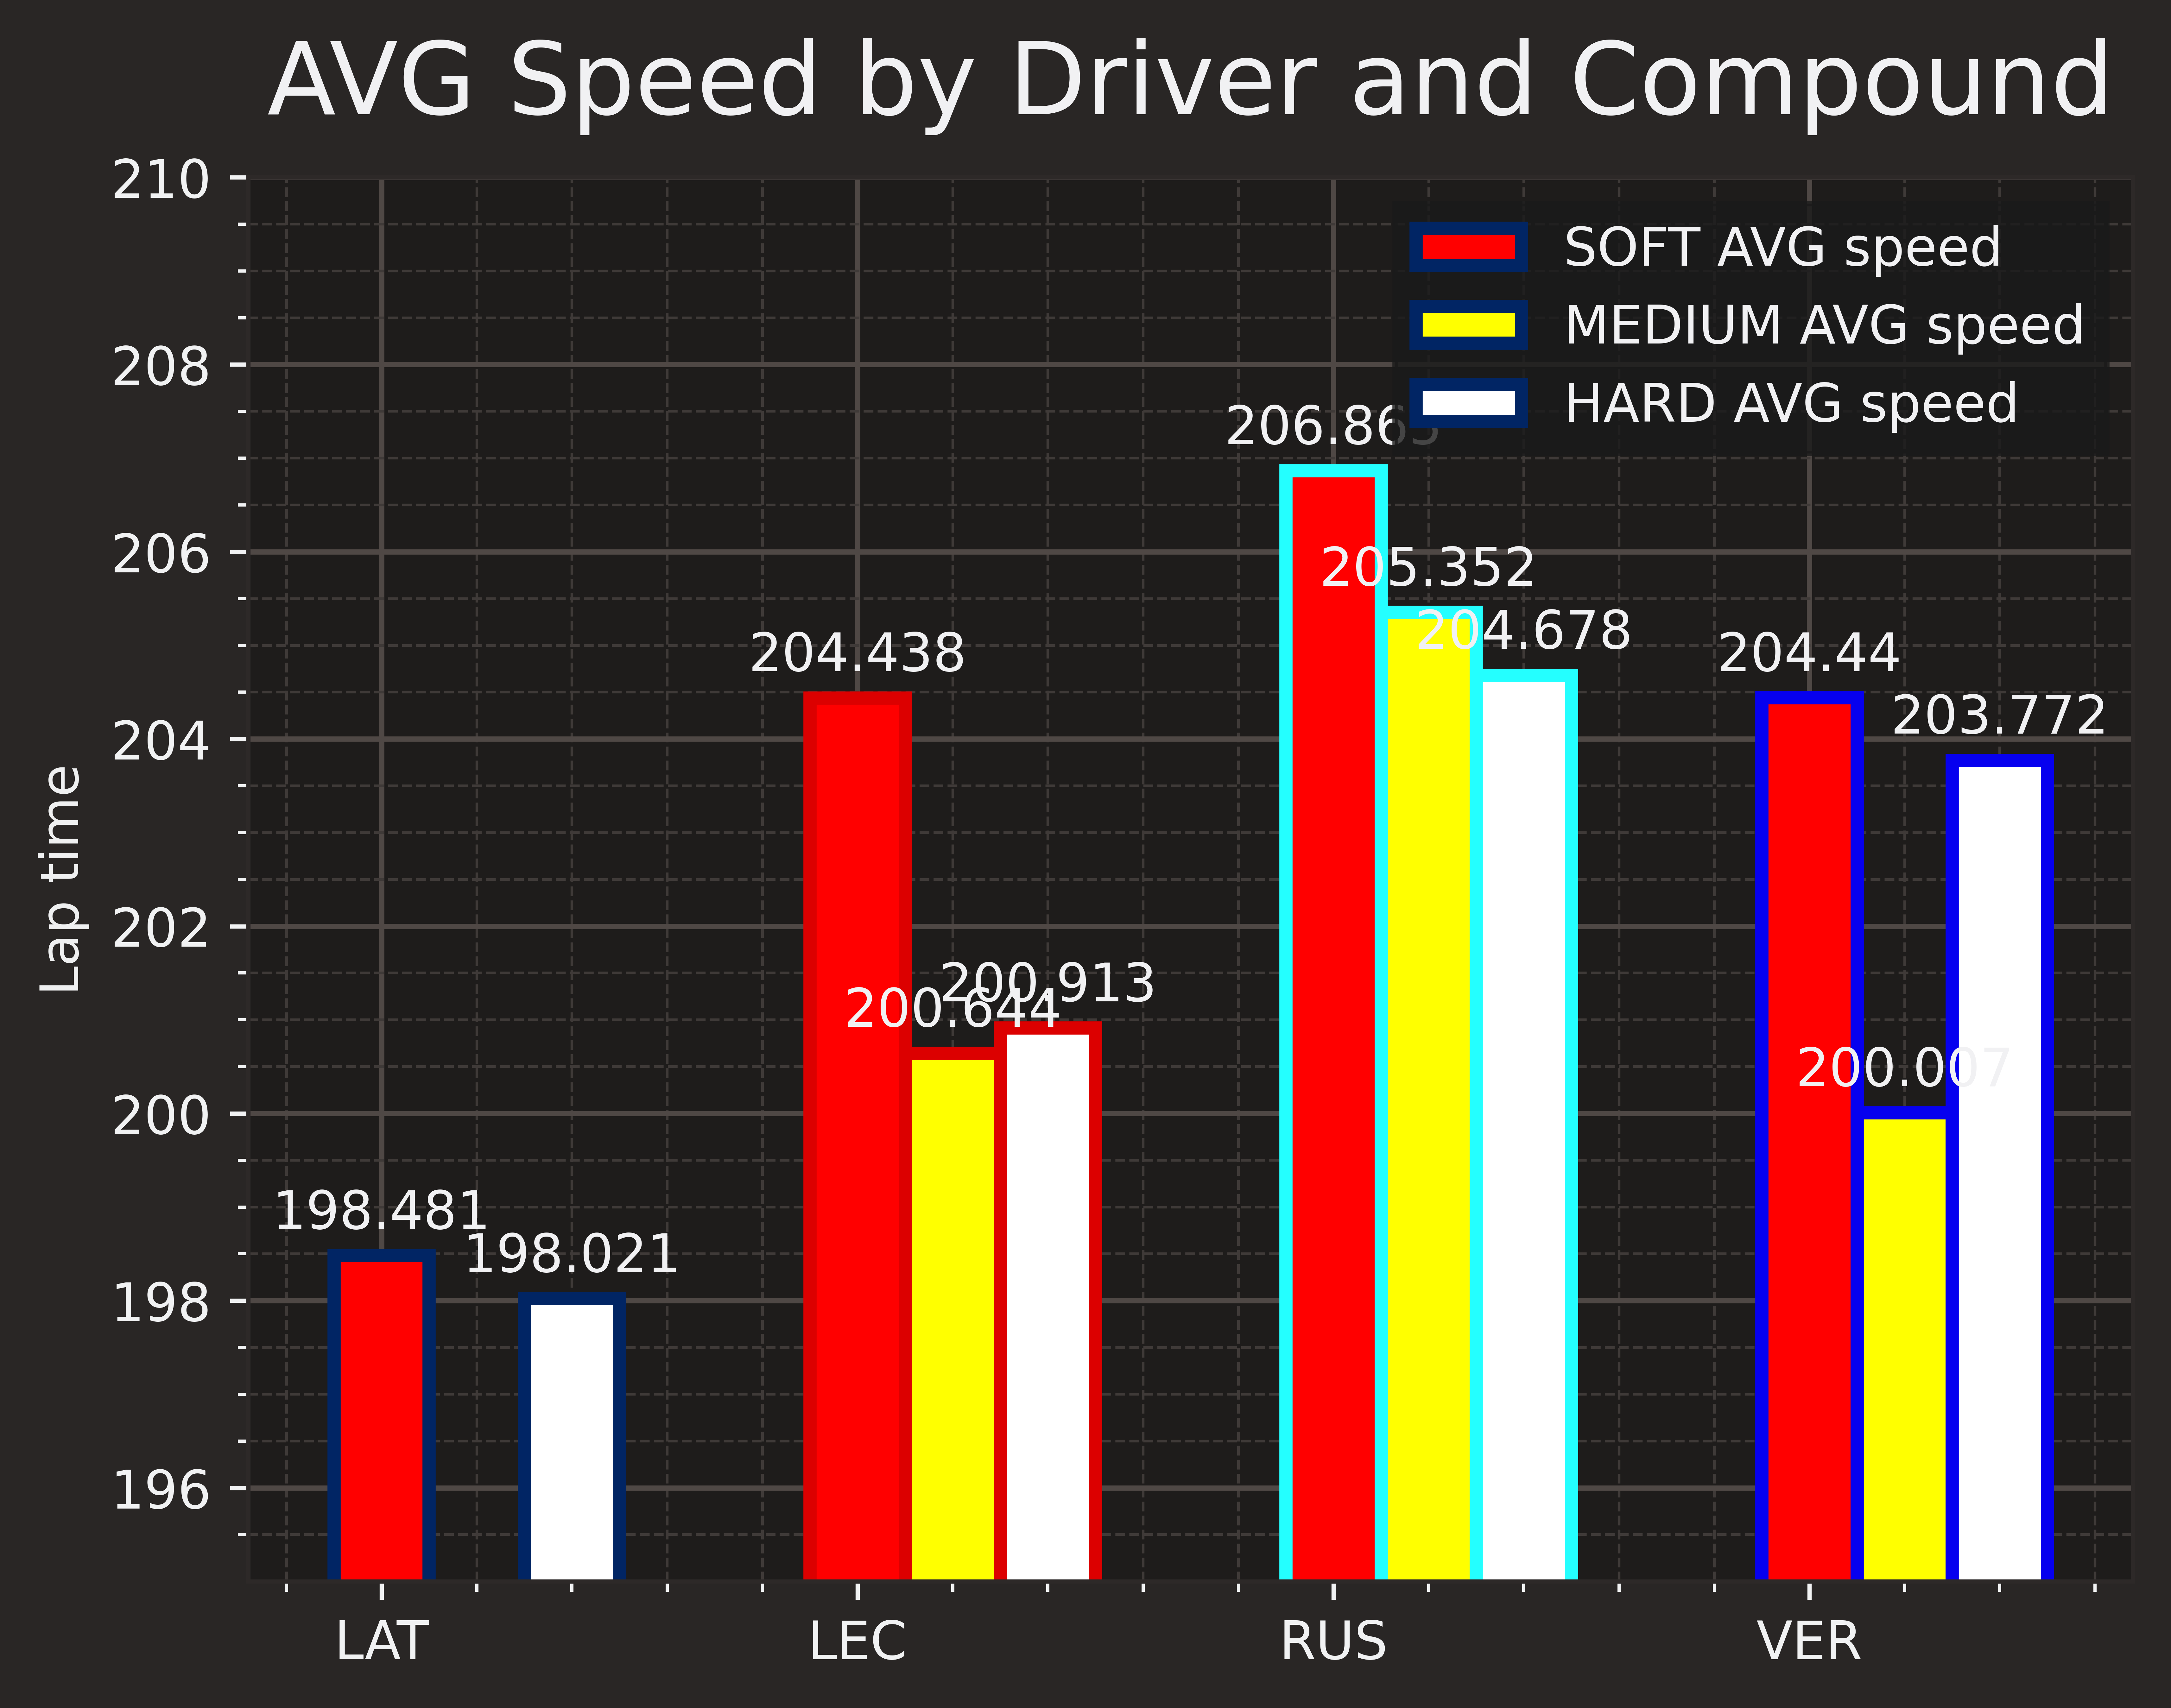

In [50]:

tyreTypes = ["SOFT", "MEDIUM", "HARD"]
tyreTypeColors = ["red", "yellow", "white"]

drivers = ["LAT", "LEC", "RUS", "VER"]

drivers.sort()
concated_names = ""
driverColors = []

for x in drivers:
    concated_names += x+"_"
    driverColors.append(ff1.plotting.driver_color(x))

fig, ax = plt.subplots()

mixed_group = pd.DataFrame()

mixed_telemetry = pd.DataFrame()

for tyreType in tyreTypes:

    for driver_item in drivers:
        driver = session.laps.pick_driver(driver_item)
        
        bestLap = driver.pick_tyre(tyreType)
        bestLap = bestLap.sort_values(by=["LapTime"])
        bestLap = bestLap[0:1]
        
        for cLap in bestLap.iterlaps():
            driver_telemetry = cLap[1].get_car_data()
            driver_telemetry["Driver"] = driver_item
            driver_telemetry["LapNumber"] = cLap[1]["LapNumber"]

            driver_telemetry["LapTime"] = cLap[1]["LapTime"]
            driver_telemetry["TyreLife"] = cLap[1]["TyreLife"]
            driver_telemetry["FreshTyre"] = cLap[1]["FreshTyre"]

            driver_telemetry['Compound'] = cLap[1]['Compound']

            mixed_telemetry = pd.concat([mixed_telemetry, driver_telemetry])

        mixed_group = pd.concat([mixed_group, bestLap])


mixed_group = mixed_group[["Driver", "LapTime", "LapNumber", "Compound", "TyreLife", "FreshTyre"]]
mixed_telemetry = mixed_telemetry[["Driver", "LapTime", "LapNumber", "Compound", "TyreLife", "FreshTyre", "Speed"]]

avg_speed = mixed_telemetry.groupby(["Driver", "LapNumber", "LapTime", "Compound"])["Speed"].mean().reset_index().sort_values("Driver")

max_speed = mixed_telemetry.groupby(["Driver", "LapNumber", "LapTime", "Compound"])["Speed"].max().reset_index().sort_values("Driver")

min_speed = mixed_telemetry.groupby(["Driver", "LapNumber", "LapTime", "Compound"])["Speed"].min().reset_index().sort_values("Driver")
# Select the compound with the highest average speed
fastest_compounds = avg_speed.loc[avg_speed.groupby(['Driver'])['Speed'].idxmax()]

# Get rid of the speed column and rename the Compound column
fastest_compounds = fastest_compounds[['Driver', 'Compound']].rename(columns={'Compound': 'Fastest_compound'})

width = 0.20
mixed_x_ticks = np.arange(len(avg_speed))

main_ticks = np.arange(avg_speed.groupby(["Compound"]).count()["LapTime"].max())
#show(avg_speed)
currentTickType = 0
for tyreType in tyreTypes:
    if currentTickType == 0:
        currentTicks = main_ticks
    else:
        currentTicks = [i+width for i in currentTicks]
    print(currentTickType)
    rects = ax.bar(currentTicks, np.array(avg_speed[avg_speed.Compound == tyreType]["Speed"]), width, color=tyreTypeColors[currentTickType], edgecolor=driverColors, linewidth=2.5, label=f"{tyreType} AVG speed")
    currentTickType = currentTickType + 1
    ax.bar_label(rects, padding=3)
    
ax.set_ylabel('Lap time')
ax.set_title('AVG Speed by Driver and Compound')

ax.set_xticks(main_ticks, np.array(avg_speed["Driver"].unique()))
ax.set_ylim([195, 210])
ax.legend()

plt.Figure(dpi=1200)
fig.set_dpi(1200)
fig.savefig(f"output/AVG_Speed_by_Tyres_{concated_names}.png", dpi=1200)
plt.show()

## Get Max speed by compund diagram

<IPython.core.display.Javascript object>

/var/folders/jl/vz624bx91n5gr7lzcql94x980000gn/T/ipykernel_29112/3375654407.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  soft_telemetry = soft_telemetry.append(driver_telemetry)
/var/folders/jl/vz624bx91n5gr7lzcql94x980000gn/T/ipykernel_29112/3375654407.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mixed_telemetry = mixed_telemetry.append(driver_telemetry)
/var/folders/jl/vz624bx91n5gr7lzcql94x980000gn/T/ipykernel_29112/3375654407.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  soft_group = soft_group.append(bestLap)
/var/folders/jl/vz624bx91n5gr7lzcql94x980000gn/T/ipykernel_29112/3375654407.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (3,).

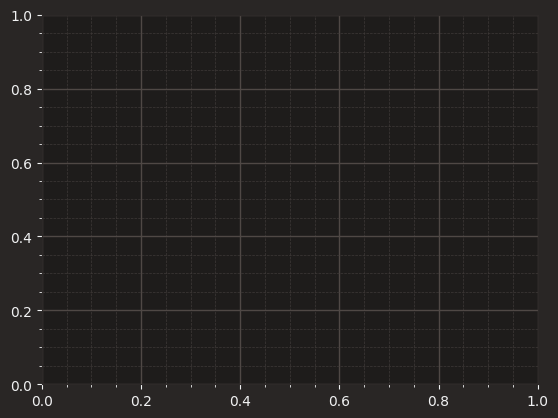

In [40]:

from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=False)

ff1.Cache.enable_cache('./cache')

plotting.setup_mpl()

session = ff1.get_session(2022, 'Dutch', 'R')
session.load()

track = session.weather_data.TrackTemp

tyreTypes = ["SOFT", "MEDIUM", "HARD"]

drivers = ["LEC", "RUS", "VER"]

drivers.sort()
concated_names = ""
driverColors = []

for x in drivers:
    concated_names += x+"_"
    driverColors.append(ff1.plotting.driver_color(x))

#driverColors.sort()

fig, ax = plt.subplots()

soft_group = pd.DataFrame()
med_group = pd.DataFrame()
hard_group = pd.DataFrame()

soft_telemetry = pd.DataFrame()
med_telemetry = pd.DataFrame()
hard_telemetry = pd.DataFrame()

mixed_telemetry = pd.DataFrame()

for driver_item in drivers:
    driver = session.laps.pick_driver(driver_item)
    
    bestLap = driver.pick_tyre("SOFT")
    bestLap = bestLap.sort_values(by=["LapTime"])
    bestLap = bestLap[0:1]
    
    for cLap in bestLap.iterlaps():
        driver_telemetry = cLap[1].get_car_data()
        driver_telemetry["Driver"] = driver_item
        driver_telemetry["LapNumber"] = cLap[1]["LapNumber"]

        driver_telemetry["LapTime"] = cLap[1]["LapTime"]
        driver_telemetry["TyreLife"] = cLap[1]["TyreLife"]
        driver_telemetry["FreshTyre"] = cLap[1]["FreshTyre"]

        driver_telemetry['Compound'] = cLap[1]['Compound']
    
        soft_telemetry = soft_telemetry.append(driver_telemetry)
        mixed_telemetry = mixed_telemetry.append(driver_telemetry)

    soft_group = soft_group.append(bestLap)

    bestLap = driver.pick_tyre("MEDIUM")
    bestLap = bestLap.sort_values(by=["LapTime"])
    bestLap = bestLap[0:1]
    for cLap in bestLap.iterlaps():
        driver_telemetry = cLap[1].get_car_data()
        driver_telemetry["Driver"] = driver_item
        driver_telemetry["LapNumber"] = cLap[1]["LapNumber"]

        driver_telemetry["LapTime"] = cLap[1]["LapTime"]
        driver_telemetry["TyreLife"] = cLap[1]["TyreLife"]
        driver_telemetry["FreshTyre"] = cLap[1]["FreshTyre"]

        driver_telemetry['Compound'] = cLap[1]['Compound']
    
        med_telemetry = med_telemetry.append(driver_telemetry)
        mixed_telemetry = mixed_telemetry.append(driver_telemetry)
    med_group = med_group.append(bestLap)

    bestLap = driver.pick_tyre("HARD")
    bestLap = bestLap.sort_values(by=["LapTime"])
    bestLap = bestLap[0:1]
    for cLap in bestLap.iterlaps():
        driver_telemetry = cLap[1].get_car_data()
        driver_telemetry["Driver"] = driver_item
        driver_telemetry["LapNumber"] = cLap[1]["LapNumber"]

        driver_telemetry["LapTime"] = cLap[1]["LapTime"]
        driver_telemetry["TyreLife"] = cLap[1]["TyreLife"]
        driver_telemetry["FreshTyre"] = cLap[1]["FreshTyre"]

        driver_telemetry['Compound'] = cLap[1]['Compound']
    
        hard_telemetry = hard_telemetry.append(driver_telemetry)
        mixed_telemetry = mixed_telemetry.append(driver_telemetry)
    hard_group = hard_group.append(bestLap)

    #driver_item.driverColor = ff1.plotting.driver_color(driver_item)

soft_group = soft_group[["Driver", "LapTime", "LapNumber", "Compound", "TyreLife", "FreshTyre"]]
med_group = med_group[["Driver", "LapTime", "LapNumber", "Compound", "TyreLife", "FreshTyre"]]
hard_group = hard_group[["Driver", "LapTime", "LapNumber", "Compound", "TyreLife", "FreshTyre"]]

""" show(soft_telemetry)

show(soft_group)
show(med_group)
show(hard_group) """

max_soft_speed = soft_telemetry.groupby(["Driver", "LapNumber", "LapTime", "Compound"])["Speed"].max().reset_index().sort_values("Driver")
max_med_speed = med_telemetry.groupby(["Driver", "LapNumber", "LapTime", "Compound"])["Speed"].max().reset_index().sort_values("Driver")
max_hard_speed = hard_telemetry.groupby(["Driver", "LapNumber", "LapTime", "Compound"])["Speed"].max().reset_index().sort_values("Driver")

width = 0.20
soft_x_ticks = np.arange(len(avg_soft_speed))
med_x_ticks = [i+width for i in soft_x_ticks]
hard_x_ticks = [i+width for i in med_x_ticks]
#x = np.array(avg_soft_speed["Driver"].values)

max_soft = np.array(max_soft_speed["Speed"].values)
max_med = np.array(max_med_speed["Speed"].values)
max_hard = np.array(max_hard_speed["Speed"].values)

labels = np.array(max_soft_speed["Driver"].values)
rects1 = ax.bar(soft_x_ticks, max_soft, width, color="red", edgecolor=driverColors, linewidth=2.5, label='Soft MAX speed')
rects2 = ax.bar(med_x_ticks, max_med, width, color="yellow", edgecolor=driverColors, linewidth=2.5, label='Medium MAX speed')
rects3 = ax.bar(hard_x_ticks, max_hard, width, color="white", edgecolor=driverColors, linewidth=2.5, label='Hard MAX speed')
#rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Lap time')
ax.set_title('MAX Speed by Driver and Compound')
ax.set_xticks(soft_x_ticks, labels)
ax.set_ylim([250, 330])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

#fig.tight_layout()
plt.Figure(dpi=1200)
fig.set_dpi(1200)
fig.savefig(f"output/MAX_Speed_by_Tyres_{concated_names}.png", dpi=1200)
plt.show()


## Min speed

In [ ]:

from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=False)

ff1.Cache.enable_cache('./cache')

plotting.setup_mpl()

session = ff1.get_session(2022, 'Dutch', 'R')
session.load()

track = session.weather_data.TrackTemp

tyreTypes = ["SOFT", "MEDIUM", "HARD"]

drivers = ["LAT", "LEC", "RUS", "VER"]

drivers.sort()
concated_names = ""
driverColors = []

for x in drivers:
    concated_names += x+"_"
    driverColors.append(ff1.plotting.driver_color(x))

#driverColors.sort()

fig, ax = plt.subplots()

soft_group = pd.DataFrame()
med_group = pd.DataFrame()
hard_group = pd.DataFrame()

soft_telemetry = pd.DataFrame()
med_telemetry = pd.DataFrame()
hard_telemetry = pd.DataFrame()

mixed_telemetry = pd.DataFrame()

for driver_item in drivers:
    driver = session.laps.pick_driver(driver_item)
    
    bestLap = driver.pick_tyre("SOFT")
    bestLap = bestLap.sort_values(by=["LapTime"])
    bestLap = bestLap[0:1]
    
    for cLap in bestLap.iterlaps():
        driver_telemetry = cLap[1].get_car_data()
        driver_telemetry["Driver"] = driver_item
        driver_telemetry["LapNumber"] = cLap[1]["LapNumber"]

        driver_telemetry["LapTime"] = cLap[1]["LapTime"]
        driver_telemetry["TyreLife"] = cLap[1]["TyreLife"]
        driver_telemetry["FreshTyre"] = cLap[1]["FreshTyre"]

        driver_telemetry['Compound'] = cLap[1]['Compound']
    
        soft_telemetry = soft_telemetry.append(driver_telemetry)
        mixed_telemetry = mixed_telemetry.append(driver_telemetry)

    soft_group = soft_group.append(bestLap)

    bestLap = driver.pick_tyre("MEDIUM")
    bestLap = bestLap.sort_values(by=["LapTime"])
    bestLap = bestLap[0:1]
    for cLap in bestLap.iterlaps():
        driver_telemetry = cLap[1].get_car_data()
        driver_telemetry["Driver"] = driver_item
        driver_telemetry["LapNumber"] = cLap[1]["LapNumber"]

        driver_telemetry["LapTime"] = cLap[1]["LapTime"]
        driver_telemetry["TyreLife"] = cLap[1]["TyreLife"]
        driver_telemetry["FreshTyre"] = cLap[1]["FreshTyre"]

        driver_telemetry['Compound'] = cLap[1]['Compound']
    
        med_telemetry = med_telemetry.append(driver_telemetry)
        mixed_telemetry = mixed_telemetry.append(driver_telemetry)
    med_group = med_group.append(bestLap)

    bestLap = driver.pick_tyre("HARD")
    bestLap = bestLap.sort_values(by=["LapTime"])
    bestLap = bestLap[0:1]
    for cLap in bestLap.iterlaps():
        driver_telemetry = cLap[1].get_car_data()
        driver_telemetry["Driver"] = driver_item
        driver_telemetry["LapNumber"] = cLap[1]["LapNumber"]

        driver_telemetry["LapTime"] = cLap[1]["LapTime"]
        driver_telemetry["TyreLife"] = cLap[1]["TyreLife"]
        driver_telemetry["FreshTyre"] = cLap[1]["FreshTyre"]

        driver_telemetry['Compound'] = cLap[1]['Compound']
    
        hard_telemetry = hard_telemetry.append(driver_telemetry)
        mixed_telemetry = mixed_telemetry.append(driver_telemetry)
    hard_group = hard_group.append(bestLap)

    #driver_item.driverColor = ff1.plotting.driver_color(driver_item)

soft_group = soft_group[["Driver", "LapTime", "LapNumber", "Compound", "TyreLife", "FreshTyre"]]
med_group = med_group[["Driver", "LapTime", "LapNumber", "Compound", "TyreLife", "FreshTyre"]]
hard_group = hard_group[["Driver", "LapTime", "LapNumber", "Compound", "TyreLife", "FreshTyre"]]

""" show(soft_telemetry)

show(soft_group)
show(med_group)
show(hard_group) """

max_soft_speed = soft_telemetry.groupby(["Driver", "LapNumber", "LapTime", "Compound"])["Speed"].min().reset_index().sort_values("Driver")
max_med_speed = med_telemetry.groupby(["Driver", "LapNumber", "LapTime", "Compound"])["Speed"].min().reset_index().sort_values("Driver")
max_hard_speed = hard_telemetry.groupby(["Driver", "LapNumber", "LapTime", "Compound"])["Speed"].min().reset_index().sort_values("Driver")

width = 0.20
soft_x_ticks = np.arange(len(avg_soft_speed))
med_x_ticks = [i+width for i in soft_x_ticks]
hard_x_ticks = [i+width for i in med_x_ticks]
#x = np.array(avg_soft_speed["Driver"].values)

max_soft = np.array(max_soft_speed["Speed"].values)
max_med = np.array(max_med_speed["Speed"].values)
max_hard = np.array(max_hard_speed["Speed"].values)

labels = np.array(max_soft_speed["Driver"].values)
rects1 = ax.bar(soft_x_ticks, max_soft, width, color="red", edgecolor=driverColors, linewidth=2.5, label='Soft MIN speed')
rects2 = ax.bar(med_x_ticks, max_med, width, color="yellow", edgecolor=driverColors, linewidth=2.5, label='Medium MIN speed')
rects3 = ax.bar(hard_x_ticks, max_hard, width, color="white", edgecolor=driverColors, linewidth=2.5, label='Hard MIN speed')
#rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Lap time')
ax.set_title('MIN Speed by Driver and Compound')
ax.set_xticks(soft_x_ticks, labels)
ax.set_ylim([80, 110])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

#fig.tight_layout()
plt.Figure(dpi=1200)
fig.set_dpi(1200)
fig.savefig(f"output/MIN_Speed_by_Tyres_{concated_names}.png", dpi=1200)
plt.show()


# Fatest lap, speed by time


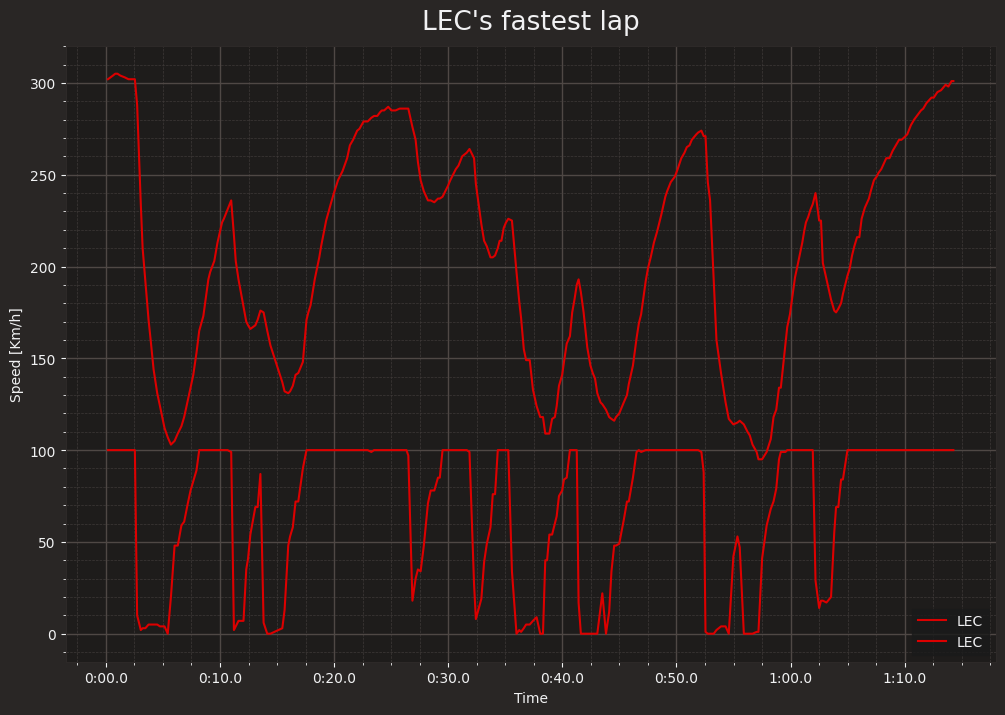

In [ ]:
driverNameFast = 'LEC'

driver_color = ff1.plotting.driver_color(driverNameFast)

fastest_lap = session.laps.pick_driver(driverNameFast).pick_fastest()
car_data = fastest_lap.get_car_data()
t = car_data['Time']
velocity = car_data['Speed']
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velocity, label=fastest_lap.Driver, color=driver_color)

ax.plot(t, car_data["Throttle"], label=fastest_lap.Driver, color=driver_color)

ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title(f"{fastest_lap.Driver}'s fastest lap")
ax.legend()

# Safetycar throttle


core           INFO 	Loading data for Dutch Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '16', '44', '11', '14', '4', '55', '31', '18', '10', '23', '47', '5', '20', '24', '3', '6', '77', '22']


455
455
[1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1

ValueError: colors and positions are unequal sized sequences

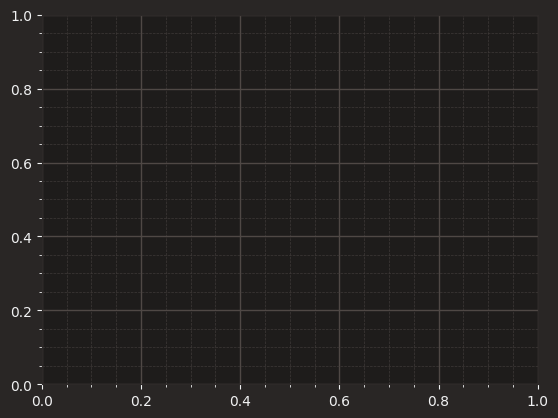

In [ ]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt

ff1.Cache.enable_cache('./cache')  

plotting.setup_mpl()


# Magyar, %-ban mennyi a pit-ben %-ban
# Hány km-t ment

session = ff1.get_session(2022, 'Dutch', 'R')
session.load()
lec = session.laps.pick_driver('LEC')[session.laps.pick_driver('LEC')["LapNumber"] == 59]

lec_tel = lec.get_car_data().add_distance()

fer_color = ff1.plotting.team_color('FER')

status = []
colorss = []
#for lap in lec.iterlaps():
i = 0
for lap in lec_tel.itertuples():
    if lap.Throttle == 0 and lap.Brake == False:
        status.append(0)
        colorss.append("#333")
    elif lap.Throttle > 0:
        status.append(1)
        colorss.append("#00ff00")
    elif lap.Brake == True:
        status.append(2)
        colorss.append("#ff0000")
    else:
        status.append(0)
        colorss.append("#333")
    i = i + 1

print(i)
print(len(colorss))
print(status)

fig, ax = plt.subplots()

ax.eventplot(lec_tel['Distance'], colors=colorss)
ax.legend()
plt.show()

""" fig, ax = plt.subplots()
ax.plot(lec_tel['Distance'], lec_tel['Speed'], color=fer_color, label='Speed')
ax.plot(lec_tel['Distance'], lec_tel['Throttle'], "--", color=fer_color, label='Throttle')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Gear')

twin = ax.twinx()
twin.plot(lec_tel['Distance'], lec_tel['nGear'], '--', color='white')
twin.plot(ver_tel['Distance'], ver_tel['nGear'], '--', color='yellow')
twin.plot(rus_tel['Distance'], rus_tel['nGear'], '--', color='cyan')
twin.set_ylabel("Gear")

ax.legend()
plt.Figure(dpi=1200)
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")
plt.show()
 """